# Danh sách sinh viên:
## 52100413 _ Nguyễn Thái Hòa
## 52100697 _ Phan Thị Thùy Linh
## 52100489 _ Trần Thị Anh Thư

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Tuổi

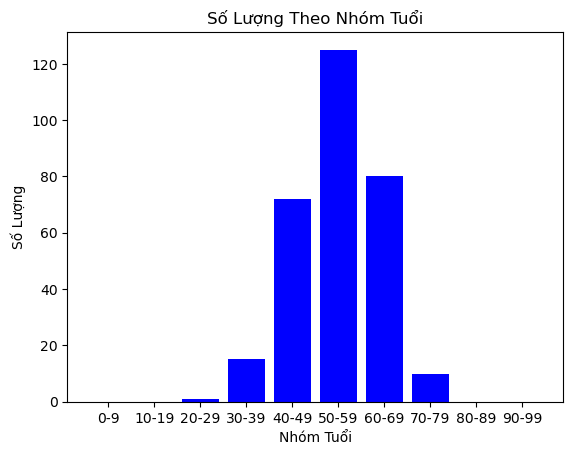

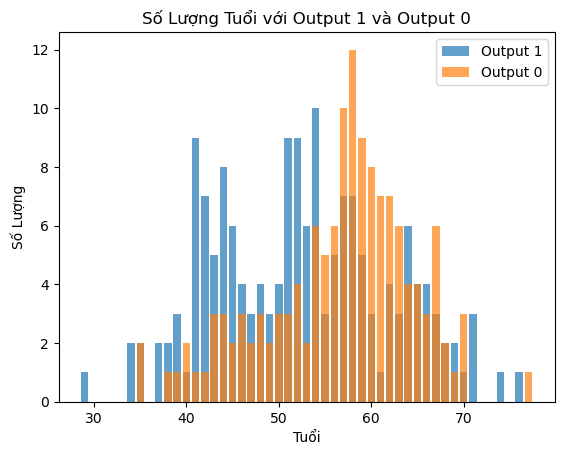

In [22]:
# Tuổi
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn và 'age' là cột chứa dữ liệu về tuổi
# Nếu bạn đã có age_count từ trước, bỏ qua bước này
age_count = df['age'].value_counts()

# Chia khoảng 10 tuổi và đếm số lượng
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
age_group_count = df['age_group'].value_counts()

# Sắp xếp theo tuổi tăng dần
age_group_count = age_group_count.sort_index()

# Vẽ biểu đồ cột
plt.bar(age_group_count.index, age_group_count.values, color='blue')
plt.xlabel('Nhóm Tuổi')
plt.ylabel('Số Lượng')
plt.title('Số Lượng Theo Nhóm Tuổi')
plt.show()
# =======================================
output_count = df['output'].value_counts()

# Thống kê số lượng tuổi với output là 1
output_1_age_count = df[df['output'] == 1]['age'].value_counts().sort_index()

# Thống kê số lượng tuổi với output là 0
output_0_age_count = df[df['output'] == 0]['age'].value_counts().sort_index()

# Vẽ biểu đồ
plt.bar(output_1_age_count.index, output_1_age_count.values, label='Output 1', alpha=0.7)
plt.bar(output_0_age_count.index, output_0_age_count.values, label='Output 0', alpha=0.7)
plt.xlabel('Tuổi')
plt.ylabel('Số Lượng')
plt.title('Số Lượng Tuổi với Output 1 và Output 0')
plt.legend()
plt.show()

In [36]:
output_count=df['output'].value_counts()
output_count

1    165
0    138
Name: output, dtype: int64

# Giới tính

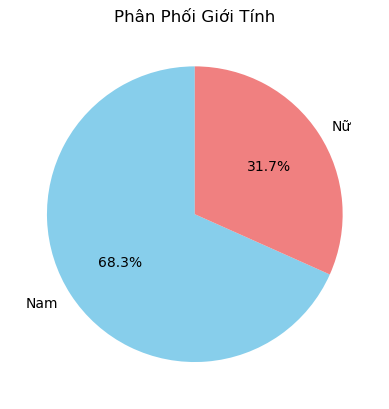

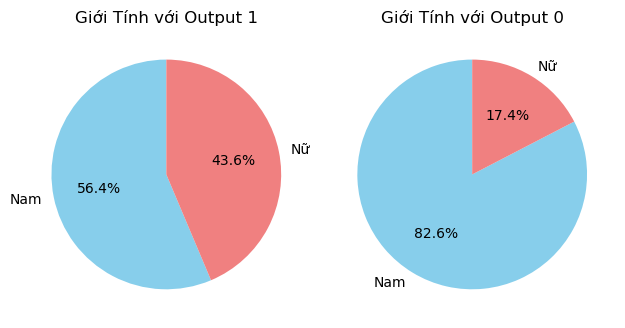

In [26]:
# Giới tính
import pandas as pd
import matplotlib.pyplot as plt

sex_count = df['sex'].value_counts()

# Chú thích giới tính
sex_labels = ['Nam', 'Nữ']

# Vẽ biểu đồ tròn
plt.pie(sex_count, labels=sex_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Phân Phối Giới Tính')
plt.show()
# ================================================

# Tách dữ liệu thành hai nhóm: output là 1 và output là 0
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng giới tính cho mỗi nhóm
sex_count_output_1 = df_output_1['sex'].value_counts()
sex_count_output_0 = df_output_0['sex'].value_counts()

# Chú thích giới tính
sex_labels = ['Nam', 'Nữ']

# Vẽ biểu đồ tròn cho output là 1
plt.subplot(1, 2, 1)
plt.pie(sex_count_output_1, labels=sex_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Giới Tính với Output 1')

# Vẽ biểu đồ tròn cho output là 0
plt.subplot(1, 2, 2)
plt.pie(sex_count_output_0, labels=sex_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Giới Tính với Output 0')

plt.tight_layout()
plt.show()

# Độ đau trong ngực

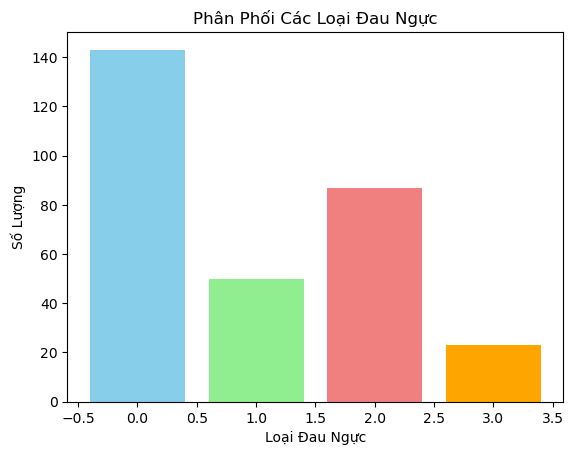

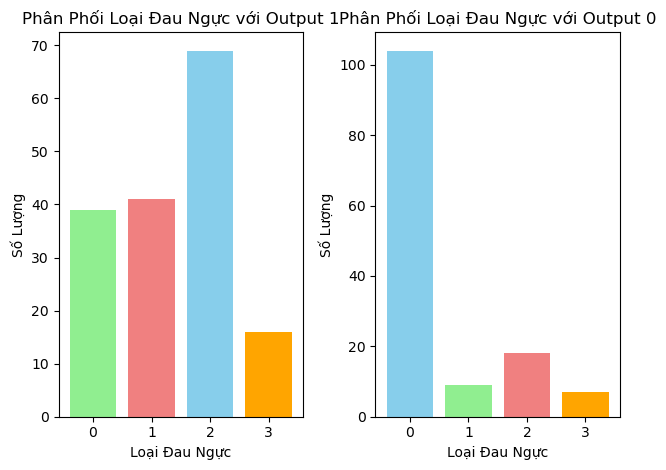

In [50]:
# Các loại đau ngực
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn và 'cp' là cột chứa dữ liệu về loại đau ngực
# Nếu bạn đã có cp_count từ trước, bỏ qua bước này
cp_count = df['cp'].value_counts()
cp_count

colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

# Vẽ biểu đồ cột với màu sắc khác nhau
plt.bar(cp_count.index, cp_count.values, color=colors)
plt.xlabel('Loại Đau Ngực')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Các Loại Đau Ngực')

# Thêm chú thích

plt.show()

# ==================================================
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng loại đau ngực cho mỗi nhóm
cp_count_output_1 = df_output_1['cp'].value_counts()
cp_count_output_0 = df_output_0['cp'].value_counts()


# Màu sắc tương ứng với từng giá trị
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

# Vẽ biểu đồ cột với màu sắc khác nhau cho output là 1
plt.subplot(1, 2, 1)
plt.bar(cp_count_output_1.index, cp_count_output_1.values, color=colors)
plt.xlabel('Loại Đau Ngực')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Loại Đau Ngực với Output 1')

# Vẽ biểu đồ cột với màu sắc khác nhau cho output là 0
plt.subplot(1, 2, 2)
plt.bar(cp_count_output_0.index, cp_count_output_0.values, color=colors)
plt.xlabel('Loại Đau Ngực')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Loại Đau Ngực với Output 0')

plt.tight_layout()
plt.show()

# Huyết áp

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distribution(df, feature, bins, labels, output_column):
    df_output_1 = df[df[output_column] == 1]
    df_output_0 = df[df[output_column] == 0]

    # Tính số lượng cho mỗi nhóm
    count_1 = df_output_1[feature].value_counts().sort_index()
    count_0 = df_output_0[feature].value_counts().sort_index()

    # Loại bỏ giá trị không cần thiết (nếu có)
    if 'remove_value' in locals():
        count_1 = count_1.loc[count_1.index != remove_value]
        count_0 = count_0.loc[count_0.index != remove_value]

    # Vẽ biểu đồ cột cho feature với output là 1
    plt.subplot(1, 2, 1)
    plt.bar(count_1.index, count_1.values, color='skyblue')
    plt.xlabel(f'Nhóm {feature}')
    plt.ylabel('Số Lượng')
    plt.title(f'Phân Phối {feature} với {output_column} 1')

    # Vẽ biểu đồ cột cho feature với output là 0
    plt.subplot(1, 2, 2)
    plt.bar(count_0.index, count_0.values, color='lightcoral')
    plt.xlabel(f'Nhóm {feature}')
    plt.ylabel('Số Lượng')
    plt.title(f'Phân Phối {feature} với {output_column} 0')

    plt.tight_layout()
    plt.show()


90-100      2
101-110    18
111-120    40
121-130    75
131-140    71
141-150    46
151-160    25
161-170    13
171-180     8
181-190     3
191-200     1
201-210     1
211-220     0
221-230     0
231-240     0
241-250     0
Name: trtbps_group, dtype: int64


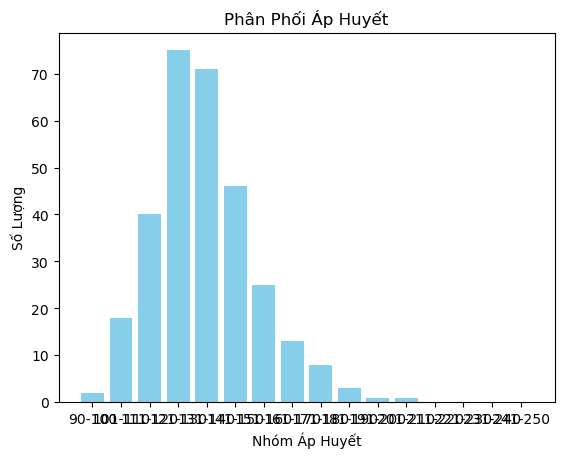

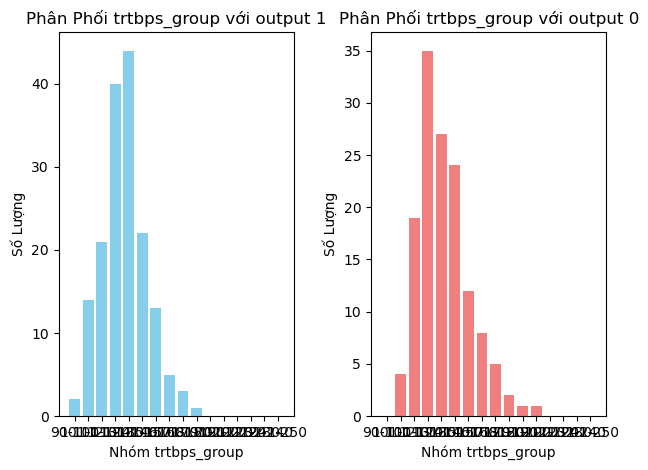

In [73]:
# Huyết áp
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn và 'trtbps' là cột chứa dữ liệu về áp huyết
# Nếu bạn đã có trtbps_count từ trước, bỏ qua bước này
trtbps_count = df['trtbps'].value_counts()

# Chia khoảng áp huyết và đếm số lượng
bins = [90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
labels = ['90-100', '101-110', '111-120', '121-130', '131-140', '141-150', '151-160', '161-170', '171-180', '181-190', '191-200', '201-210', '211-220', '221-230', '231-240', '241-250']
df['trtbps_group'] = pd.cut(df['trtbps'], bins=bins, labels=labels, right=False)
trtbps_group_count = df['trtbps_group'].value_counts().sort_index()

# Hiển thị kết quả
print(trtbps_group_count)
plt.bar(trtbps_group_count.index, trtbps_group_count.values, color='skyblue')
plt.xlabel('Nhóm Áp Huyết')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Áp Huyết')
plt.show()
# =====================================================
plot_distribution(df, 'trtbps_group', bins, labels, 'output')

# Choresterol

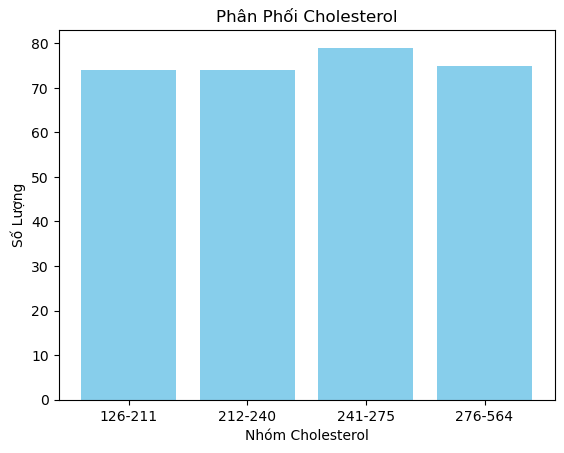

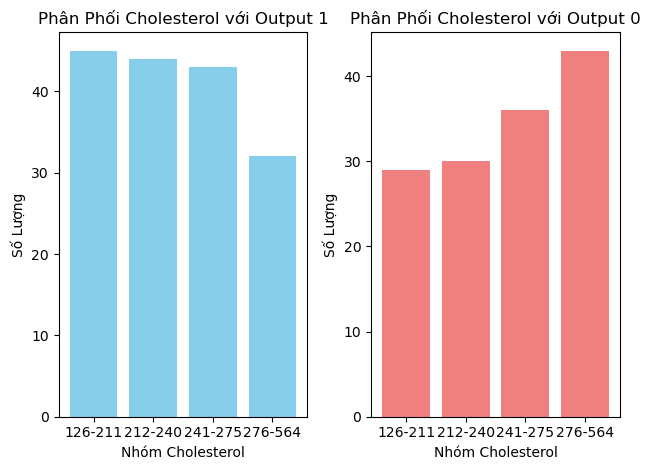

In [78]:
# Cholesterol
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử df là DataFrame của bạn và 'chol' là cột chứa dữ liệu về cholesterol
# Nếu bạn đã có chol_count từ trước, bỏ qua bước này
chol_count = df['chol'].value_counts()

# Chia khoảng cholesterol và đếm số lượng
bins = [126, 211, 240, 275, 564]
labels = ['126-211', '212-240', '241-275', '276-564']
df['chol_group'] = pd.cut(df['chol'], bins=bins, labels=labels, right=False)
chol_group_count = df['chol_group'].value_counts().sort_index()

# Vẽ biểu đồ cột cho Cholesterol
plt.bar(chol_group_count.index, chol_group_count.values, color='skyblue')
plt.xlabel('Nhóm Cholesterol')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Cholesterol')
plt.show()
# ====================================================
# Tách dữ liệu thành hai nhóm: output là 1 và output là 0
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng Cholesterol cho mỗi nhóm và loại bỏ khoảng 0-126
chol_group_count_1 = df_output_1['chol_group'].value_counts().sort_index()
chol_group_count_0 = df_output_0['chol_group'].value_counts().sort_index()

# Vẽ biểu đồ cột cho Cholesterol với output là 1
plt.subplot(1, 2, 1)
plt.bar(chol_group_count_1.index, chol_group_count_1.values, color='skyblue')
plt.xlabel('Nhóm Cholesterol')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Cholesterol với Output 1')

# Vẽ biểu đồ cột cho Cholesterol với output là 0
plt.subplot(1, 2, 2)
plt.bar(chol_group_count_0.index, chol_group_count_0.values, color='lightcoral')
plt.xlabel('Nhóm Cholesterol')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Cholesterol với Output 0')

plt.tight_layout()
plt.show()

# OldPeak 

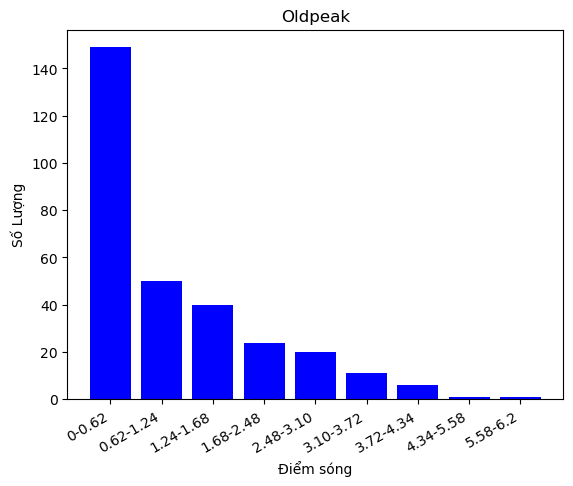

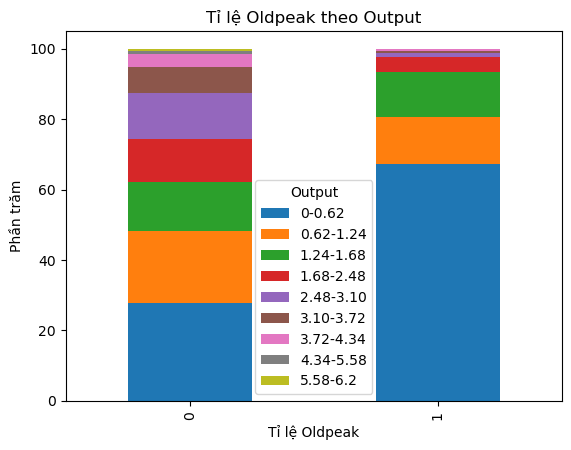

In [3]:
# Oldpeak
import pandas as pd
import matplotlib.pyplot as plt

old_peak= df['oldpeak'].value_counts()

bins = [0, 0.62, 1.24, 1.86, 2.48, 3.10, 3.72, 4.34, 5.58, 6.2]
labels = ['0-0.62', '0.62-1.24', '1.24-1.68', '1.68-2.48', '2.48-3.10', '3.10-3.72', '3.72-4.34','4.34-5.58','5.58-6.2']
df['oldpeak_group'] = pd.cut(df['oldpeak'], bins=bins, labels=labels, right=False)
plt.xticks(rotation=30, ha='right')
oldpeak_group_count = df['oldpeak_group'].value_counts()

# Sắp xếp theo oldpeak tăng dần
oldpeak_group_count = oldpeak_group_count.sort_index()

# Vẽ biểu đồ cột
plt.bar(oldpeak_group_count.index, oldpeak_group_count.values, color='blue')
plt.xlabel('Điểm sóng')
plt.ylabel('Số Lượng')
plt.title('Oldpeak')
plt.show()

# =======================================
#Thống kê số lượng theo output
output_counts = df['output'].value_counts()
# Thống kê số lượng oldpeak theo output
output_oldpeak_counts = df.groupby('output')['oldpeak_group'].value_counts().unstack().fillna(0)
# Chuyển sang phần trăm
output_oldpeak_percentage = output_oldpeak_counts.div(output_oldpeak_counts.sum(axis=1), axis=0) * 100
# Vẽ biểu đồ
output_oldpeak_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Tỉ lệ Oldpeak')
plt.ylabel('Phần trăm')
plt.title('Tỉ lệ Oldpeak theo Output')
plt.legend(title='Output')
plt.show()

# Slope

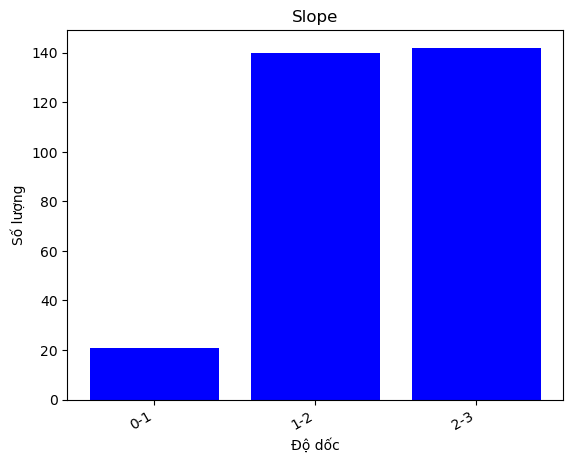

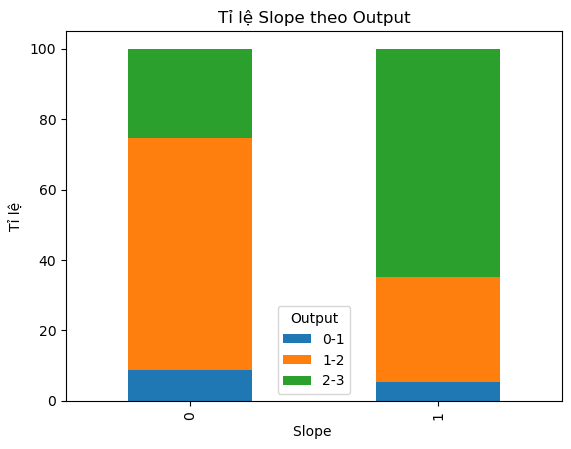

In [4]:
# Slope
import pandas as pd
import matplotlib.pyplot as plt

slope= df['slp'].value_counts()

bins = [0, 1, 2, 3]
labels = ['0-1', '1-2', '2-3']
df['slp_group'] = pd.cut(df['slp'], bins=bins, labels=labels, right=False)
plt.xticks(rotation=30, ha='right')
slp_group_count = df['slp_group'].value_counts()

# Sắp xếp theo oldpeak tăng dần
slp_group_count = slp_group_count.sort_index()

# Vẽ biểu đồ cột
plt.bar(slp_group_count.index, slp_group_count.values, color='blue')
plt.xlabel('Độ dốc')
plt.ylabel('Số lượng')
plt.title('Slope')
plt.show()


# =======================================
# output_count = df['output'].value_counts()
# # Thống kê số lượng tuổi với output là 1
# output_1_slp_count = df[df['output'] == 1]['slp_group'].value_counts().sort_index()

# # Thống kê số lượng tuổi với output là 0
# output_0_slp_count = df[df['output'] == 0]['slp_group'].value_counts().sort_index()

# # Vẽ biểu đồ
# plt.bar(output_1_slp_count.index, output_1_slp_count.values, label='Output 1', alpha=1)
# plt.bar(output_0_slp_count.index, output_0_slp_count.values, label='Output 0', alpha=1)
# plt.xlabel('Tỉ lệ')
# plt.ylabel('Số Lượng')
# plt.title('Tỉ lệ Oldpeak Output 1 và Output 0')
# plt.legend()
# plt.show()

output_counts = df['output'].value_counts()
# Thống kê số lượng oldpeak theo output
output_slp_counts = df.groupby('output')['slp_group'].value_counts().unstack().fillna(0)
# Chuyển sang phần trăm
output_slp_percentage = output_slp_counts.div(output_slp_counts.sum(axis=1), axis=0) * 100
# Vẽ biểu đồ
output_slp_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Slope ')
plt.ylabel('Tỉ lệ')
plt.title('Tỉ lệ Slope theo Output')
plt.legend(title='Output')
plt.show()



# Caa

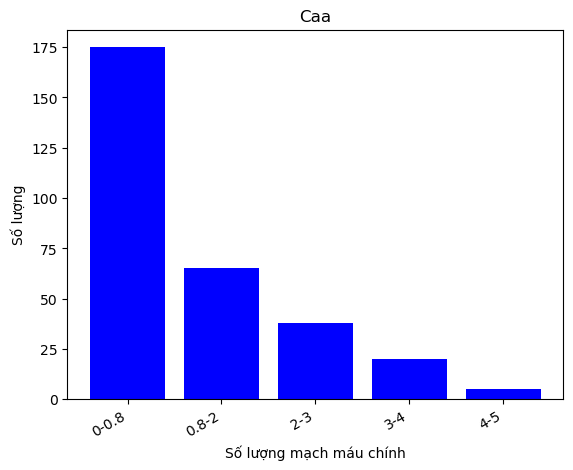

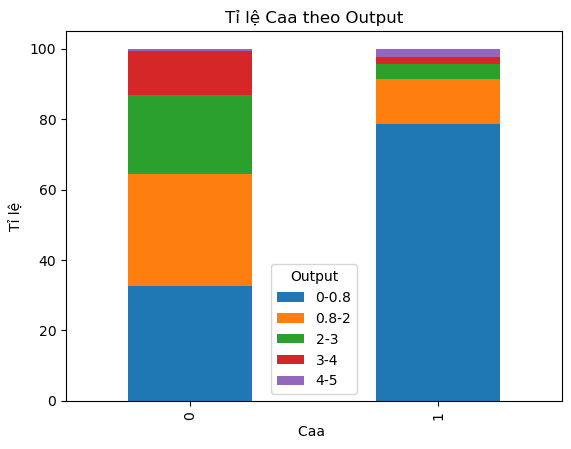

In [5]:
# Caa
import pandas as pd
import matplotlib.pyplot as plt

caa= df['caa'].value_counts()

bins = [0, 0.8, 2, 3, 4,5]
labels = ['0-0.8', '0.8-2', '2-3','3-4','4-5']
df['caa_group'] = pd.cut(df['caa'], bins=bins, labels=labels, right=False)
plt.xticks(rotation=30, ha='right')
caa_group_count = df['caa_group'].value_counts()

caa_group_count = caa_group_count.sort_index()

# Vẽ biểu đồ cột
plt.bar(caa_group_count.index, caa_group_count.values, color='blue')
plt.xlabel('Số lượng mạch máu chính')
plt.ylabel('Số lượng')
plt.title('Caa')
plt.show()


# =======================================
output_counts = df['output'].value_counts()
# Thống kê số lượng caa theo output
output_caa_counts = df.groupby('output')['caa_group'].value_counts().unstack().fillna(0)
# Chuyển sang phần trăm
output_caa_percentage = output_caa_counts.div(output_caa_counts.sum(axis=1), axis=0) * 100
# Vẽ biểu đồ
output_caa_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Caa ')
plt.ylabel('Tỉ lệ')
plt.title('Tỉ lệ Caa theo Output')
plt.legend(title='Output')
plt.show()



# Thall

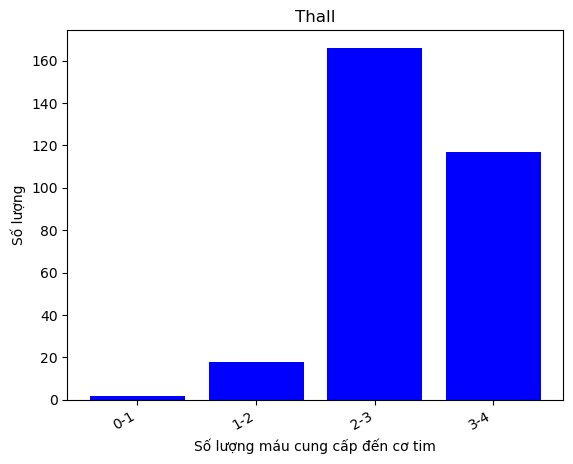

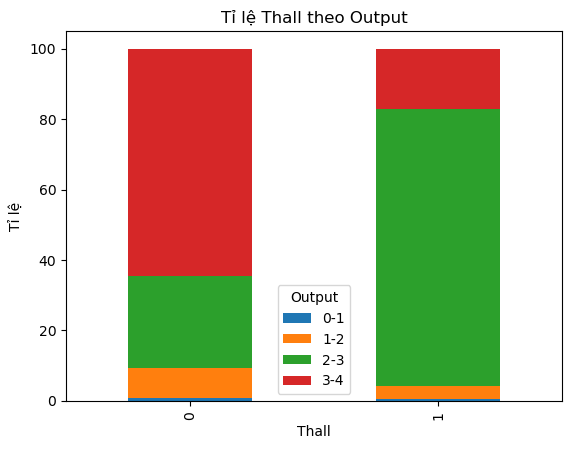

In [6]:
# Thall
import pandas as pd
import matplotlib.pyplot as plt

thall= df['thall'].value_counts()

bins = [0,1, 2, 3, 4]
labels = ['0-1', '1-2', '2-3','3-4']
df['thall_group'] = pd.cut(df['thall'], bins=bins, labels=labels, right=False)
plt.xticks(rotation=30, ha='right')
thall_group_count = df['thall_group'].value_counts()

thall_group_count = thall_group_count.sort_index()

# Vẽ biểu đồ cột
plt.bar(thall_group_count.index, thall_group_count.values, color='blue')
plt.xlabel('Số lượng máu cung cấp đến cơ tim')
plt.ylabel('Số lượng')
plt.title('Thall')
plt.show()


# =======================================
output_counts = df['output'].value_counts()
# Thống kê số lượng thall theo output
output_thall_counts = df.groupby('output')['thall_group'].value_counts().unstack().fillna(0)
# Chuyển sang phần trăm
output_thall_percentage = output_thall_counts.div(output_thall_counts.sum(axis=1), axis=0) * 100
# Vẽ biểu đồ
output_thall_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Thall')
plt.ylabel('Tỉ lệ')
plt.title('Tỉ lệ Thall theo Output')
plt.legend(title='Output')
plt.show()



# ĐO CHỈ SỐ ĐƯỜNG TRONG MÁU

In [12]:
df_copy= df.copy()
df_copy['restecg'].replace(['normal', 'st-t abnormality', 'lv hypertrophy'],[0,1,2],inplace=True)
df_copy['exng'].replace([True,False],[1,0],inplace=True)
df_copy['fbs'].replace([True,False],[1,0],inplace=True)
output_count=df['output'].value_counts()
data1 = df_copy.head()
data2 = df_copy.tail()
conc_heart = pd.concat([data1,data2],axis=0, ignore_index=True)

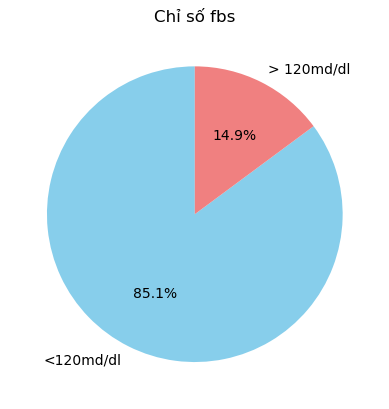

<Figure size 640x480 with 0 Axes>

In [13]:
# ĐO CHỈ SỐ ĐƯỜNG TRONG MÁU
import pandas as pd
import matplotlib.pyplot as plt

fbs_count = df['fbs'].value_counts()

fbs_labels = ['<120md/dl', '> 120md/dl']

# Vẽ biểu đồ tròn
plt.pie(fbs_count, labels=fbs_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Chỉ số fbs')
plt.show()
# ================================================

# Tách dữ liệu thành hai nhóm: output là 1 và output là 0
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng fbs cho mỗi nhóm
fbs_count_output_1 = df_output_1['fbs'].value_counts()
fbs_count_output_0 = df_output_0['fbs'].value_counts()


# # Vẽ biểu đồ tròn cho output là 1
# plt.subplot(1, 2, 1)
# plt.pie(fbs_count_output_1, labels=fbs_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
# plt.title('fbs với Output 1')

# # Vẽ biểu đồ tròn cho output là 0
# plt.subplot(1, 2, 2)
# plt.pie(fbs_count_output_0, labels=fbs_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
# plt.title('fbs với Output 0')

plt.tight_layout()
plt.show()

In [14]:
print(df_copy["fbs"].value_counts(dropna=False))

0    258
1     45
Name: fbs, dtype: int64


In [15]:
##SO Sánh Độ bất thường đường huyết theo độ tuổi với trung bình tuổi và nhịp tim tối đa
ave_age = sum(df_copy.age) / len(df_copy.age)
print("average of age: ", ave_age)

df_copy["average_age"] = ["high" if i>ave_age else "down" for i in df_copy.age]


ave_fbs = sum(df_copy.fbs) / len(df_copy.fbs)
print("average of fbs: ", ave_fbs)

df_copy["average_fbs"] = ["high" if i>ave_fbs else "down" for i in df_copy.fbs]

df_copy.loc[:50,["age","average_age","average_fbs","fbs"]]

average of age:  54.366336633663366
average of fbs:  0.1485148514851485


,age,average_age,average_fbs,fbs
0,63,high,high,1
1,37,down,down,0
2,41,down,down,0
3,56,high,down,0
4,57,high,down,0
5,57,high,down,0
6,56,high,down,0
7,44,down,down,0
8,52,down,high,1
9,57,high,down,0


# 2.Điện tâm đồ (restecg-resting electrocardiographic results) (0;1;2)

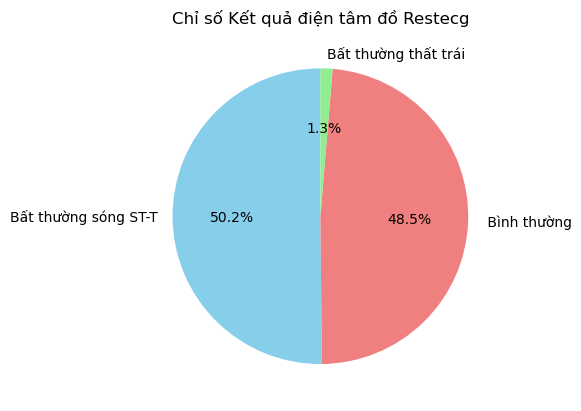

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

restecg_count = df['restecg'].value_counts()

restecg_labels = ['Bất thường sóng ST-T',' Bình thường','Bất thường thất trái']

# Vẽ biểu đồ tròn
plt.pie(restecg_count, labels=restecg_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Chỉ số Kết quả điện tâm đồ Restecg')
plt.show()

In [17]:
print(df_copy["restecg"].value_counts(dropna=False))

1    152
0    147
2      4
Name: restecg, dtype: int64


In [18]:
##SO Sánh ĐỘ BẤT THường trong Điện tâm đồ theo độ tuổi với trung bình tuổi và nhịp tim tối đa
ave_age = sum(df_copy.age) / len(df_copy.age)
print("average of age: ", ave_age)

df_copy["average_age"] = ["high" if i>ave_age else "down" for i in df_copy.age]


ave_restecg = sum(df_copy.restecg) / len(df_copy.restecg)
print("average of restecg: ", ave_restecg)

df_copy["average_restecg"] = ["high" if i>ave_restecg else "down" for i in df_copy.restecg]

df_copy.loc[:50,["age","average_age","average_restecg","restecg"]]

average of age:  54.366336633663366
average of restecg:  0.528052805280528


,age,average_age,average_restecg,restecg
0,63,high,down,0
1,37,down,high,1
2,41,down,down,0
3,56,high,high,1
4,57,high,high,1
5,57,high,high,1
6,56,high,down,0
7,44,down,high,1
8,52,down,high,1
9,57,high,high,1


# 3.Nhịp tim tối đa đạt được (thalach-maximum heart rate achieved) (từ 71 đến 202)

In [19]:
##SO Sánh nhịp tim tối đa theo độ tuổi với trung bình tuổi và nhịp tim tối đa
ave_age = sum(df_copy.age) / len(df_copy.age)
print("average of age: ", ave_age)

df_copy["average_age"] = ["high" if i>ave_age else "down" for i in df_copy.age]


ave_thalachh = sum(df_copy.thalachh) / len(df_copy.thalachh)
print("average of thalachh: ", ave_thalachh)

df_copy["average_thalachh"] = ["high" if i>ave_thalachh else "down" for i in df_copy.thalachh]

df_copy.loc[:50,["age","average_age","average_thalachh","thalachh"]]

average of age:  54.366336633663366
average of thalachh:  149.64686468646866


,age,average_age,average_thalachh,thalachh
0,63,high,high,150
1,37,down,high,187
2,41,down,high,172
3,56,high,high,178
4,57,high,high,163
5,57,high,down,148
6,56,high,high,153
7,44,down,high,173
8,52,down,high,162
9,57,high,high,174


In [20]:
print(df_copy["average_thalachh"].value_counts(dropna=False))

high    171
down    132
Name: average_thalachh, dtype: int64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_distribution(df, feature, bins, labels, output_column):
    df_output_1 = df[df[output_column] == 1]
    df_output_0 = df[df[output_column] == 0]

    # Tính số lượng cho mỗi nhóm
    count_1 = df_output_1[feature].value_counts().sort_index()
    count_0 = df_output_0[feature].value_counts().sort_index()

    # Loại bỏ giá trị không cần thiết (nếu có)
    if 'remove_value' in locals():
        count_1 = count_1.loc[count_1.index != remove_value]
        count_0 = count_0.loc[count_0.index != remove_value]

    # Vẽ biểu đồ cột cho feature với output là 1
    plt.subplot(1, 2, 1)
    plt.bar(count_1.index, count_1.values, color='skyblue')
    plt.xlabel(f'Nhóm {feature}')
    plt.ylabel('Số Lượng')
    plt.title(f'Phân Phối {feature} với {output_column} 1')

    # Vẽ biểu đồ cột cho feature với output là 0
    plt.subplot(1, 2, 2)
    plt.bar(count_0.index, count_0.values, color='lightcoral')
    plt.xlabel(f'Nhóm {feature}')
    plt.ylabel('Số Lượng')
    plt.title(f'Phân Phối {feature} với {output_column} 0')

    plt.tight_layout()
    plt.show()


# Phân Phối Nhịp tim tối đa

70-80       1
81-90       1
91-100      6
101-110    10
111-120    16
121-130    25
131-140    26
141-150    47
151-160    52
161-170    56
171-180    43
181-190    15
191-200     4
201-210     1
211-220     0
221-230     0
231-240     0
241-250     0
Name: thalachh_group, dtype: int64


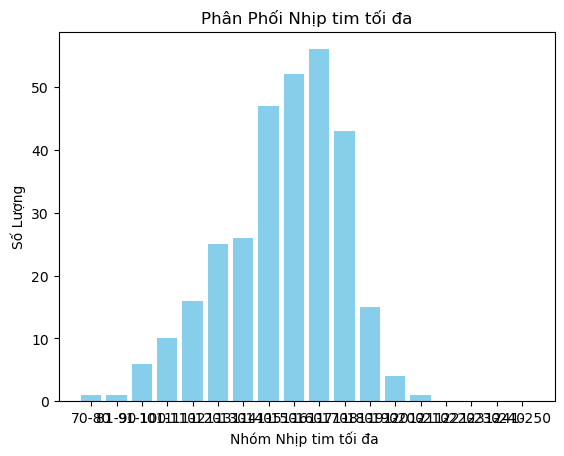

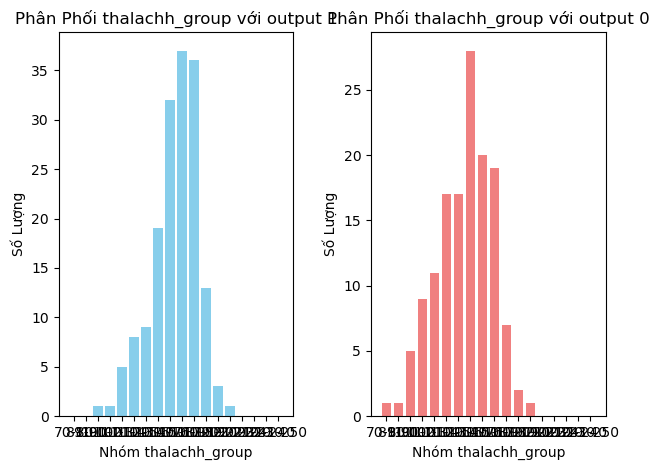

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


trtbps_count = df['thalachh'].value_counts()

# Chia khoảng và đếm số lượng
bins = [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250]
labels = ['70-80','81-90','91-100', '101-110', '111-120', '121-130', '131-140', '141-150', '151-160', '161-170', '171-180', '181-190', '191-200', '201-210', '211-220', '221-230', '231-240', '241-250']
df['thalachh_group'] = pd.cut(df['thalachh'], bins=bins, labels=labels, right=False)
thalachh_group_count = df['thalachh_group'].value_counts().sort_index()

# Hiển thị kết quả
print(thalachh_group_count)
plt.bar(thalachh_group_count.index, thalachh_group_count.values, color='skyblue')
plt.xlabel('Nhóm Nhịp tim tối đa ')
plt.ylabel('Số Lượng')
plt.title('Phân Phối Nhịp tim tối đa')
plt.show()
# =====================================================
plot_distribution(df, 'thalachh_group', bins, labels, 'output')

In [23]:
series = df_copy["thalachh"]
print(type(series))
print(series.head())
print("-----------")
data_frame = df_copy[["thalachh"]]
print(type(data_frame))
print(data_frame.head())

<class 'pandas.core.series.Series'>
0    150
1    187
2    172
3    178
4    163
Name: thalachh, dtype: int64
-----------
<class 'pandas.core.frame.DataFrame'>
   thalachh
0       150
1       187
2       172
3       178
4       163


In [24]:
print(df_copy["thalachh"].value_counts(dropna=False))

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalachh, Length: 91, dtype: int64


# Huyết áp

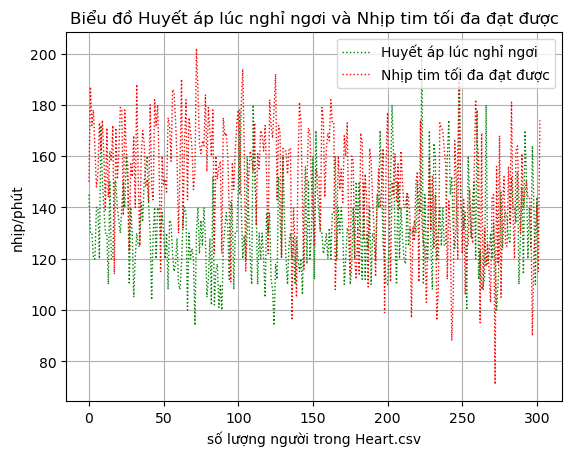

In [25]:
df_copy.trtbps.plot(kind="line", color="g", label="Huyết áp lúc nghỉ ngơi",linewidth=1,alpha = 1,grid = True,linestyle = ':')
df_copy.thalachh.plot(kind="line", color="r", label="Nhịp tim tối đa đạt được", linewidth=1,alpha = 1,grid = True,linestyle = ':')
plt.legend(loc='upper right')    
plt.xlabel('số lượng người trong Heart.csv')              
plt.ylabel('nhịp/phút')
plt.title('Biểu đồ Huyết áp lúc nghỉ ngơi và Nhịp tim tối đa đạt được')            
plt.show()

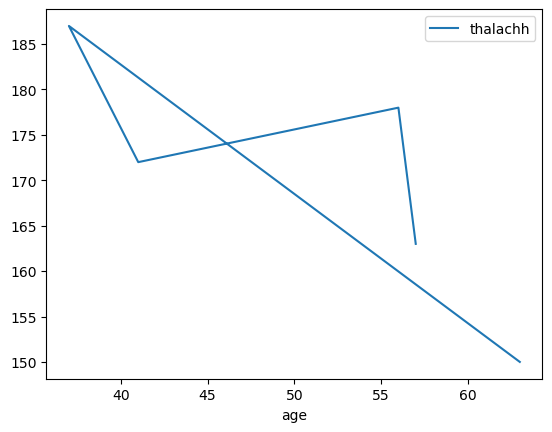

In [26]:
data1.plot(kind="line", x="age", y="thalachh")
plt.show()

# Đau thắt ngực do gắng sức (exang-exercise induced angina (1 = yes; 0 = no))

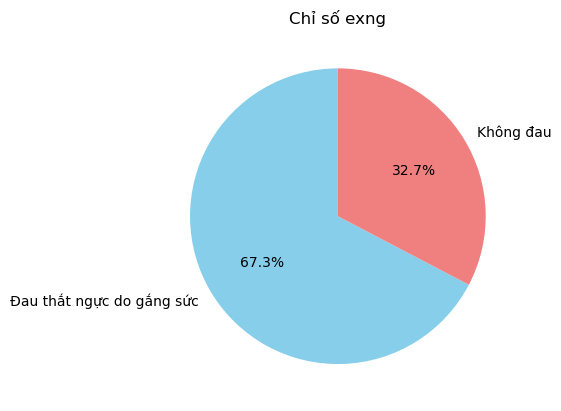

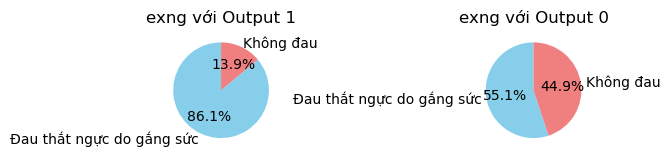

In [27]:
# ĐO CHỈ SỐ ĐƯỜNG TRONG MÁU
import pandas as pd
import matplotlib.pyplot as plt

exng_count = df['exng'].value_counts()

exng_labels = ['Đau thắt ngực do gắng sức', 'Không đau']

# Vẽ biểu đồ tròn
plt.pie(exng_count, labels=exng_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Chỉ số exng')
plt.show()
# ================================================

# Tách dữ liệu thành hai nhóm: output là 1 và output là 0
df_output_1 = df[df['output'] == 1]
df_output_0 = df[df['output'] == 0]

# Tính số lượng exng cho mỗi nhóm
exng_count_output_1 = df_output_1['exng'].value_counts()
exng_count_output_0 = df_output_0['exng'].value_counts()


# Vẽ biểu đồ tròn cho output là 1
plt.subplot(1, 2, 1)
plt.pie(exng_count_output_1, labels=exng_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('exng với Output 1')

# Vẽ biểu đồ tròn cho output là 0
plt.subplot(1, 2, 2)
plt.pie(exng_count_output_0, labels=exng_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('exng với Output 0')

plt.tight_layout()
plt.show()

In [28]:
##SO Sánh Độ bất thường đau thắt ngực theo độ tuổi với trung bình tuổi và nhịp tim tối đa
ave_age = sum(df_copy.age) / len(df_copy.age)
print("average of age: ", ave_age)

df_copy["average_age"] = ["high" if i>ave_age else "down" for i in df_copy.age]


ave_exng = sum(df_copy.exng) / len(df_copy.exng)
print("average of exng: ", ave_exng)

df_copy["average_exng"] = ["high" if i>ave_exng else "down" for i in df_copy.exng]

df_copy.loc[:50,["age","average_age","average_exng","exng"]]


average of age:  54.366336633663366
average of exng:  0.32673267326732675


,age,average_age,average_exng,exng
0,63,high,down,0
1,37,down,down,0
2,41,down,down,0
3,56,high,down,0
4,57,high,high,1
5,57,high,down,0
6,56,high,down,0
7,44,down,down,0
8,52,down,down,0
9,57,high,down,0


In [29]:
print(df_copy["average_exng"].value_counts(dropna=False))
print(df_copy["average_age"].value_counts(dropna=False))

down    204
high     99
Name: average_exng, dtype: int64
high    159
down    144
Name: average_age, dtype: int64


In [30]:
print(df_copy["exng"].value_counts(dropna=False))

0    204
1     99
Name: exng, dtype: int64
